<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Energy_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

DATA EXTRACTION

In [ ]:
energy_train = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/train_energy_data.csv")
energy_train.head(2), energy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


(  Building Type  Square Footage  Number of Occupants  Appliances Used  \
 0   Residential            7063                   76               10   
 1    Commercial           44372                   66               45   
 
    Average Temperature Day of Week  Energy Consumption  
 0                29.84     Weekday             2713.95  
 1                16.72     Weekday             5744.99  ,
 None)

In [ ]:
energy_test = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/test_energy_data.csv")
energy_test.head(2), energy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


(  Building Type  Square Footage  Number of Occupants  Appliances Used  \
 0   Residential           24563                   15                4   
 1    Commercial           27583                   56               23   
 
    Average Temperature Day of Week  Energy Consumption  
 0                28.52     Weekday             2865.57  
 1                23.07     Weekend             4283.80  ,
 None)

DATA ANALYSIS

---

In [ ]:
sns.set()

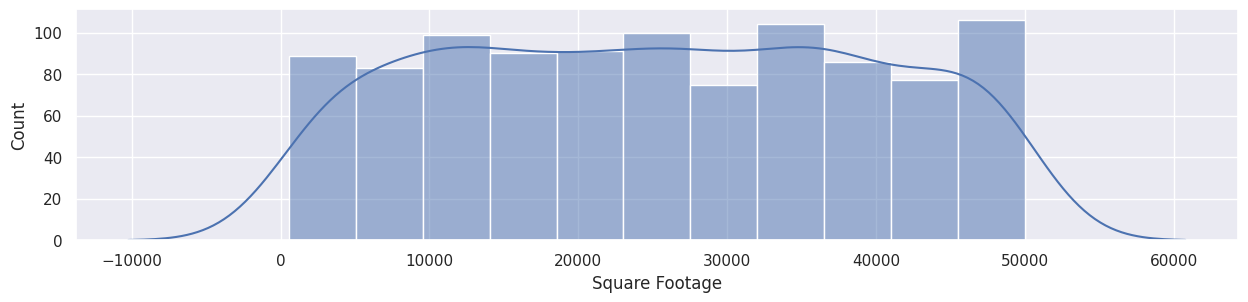

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(energy_train['Square Footage'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

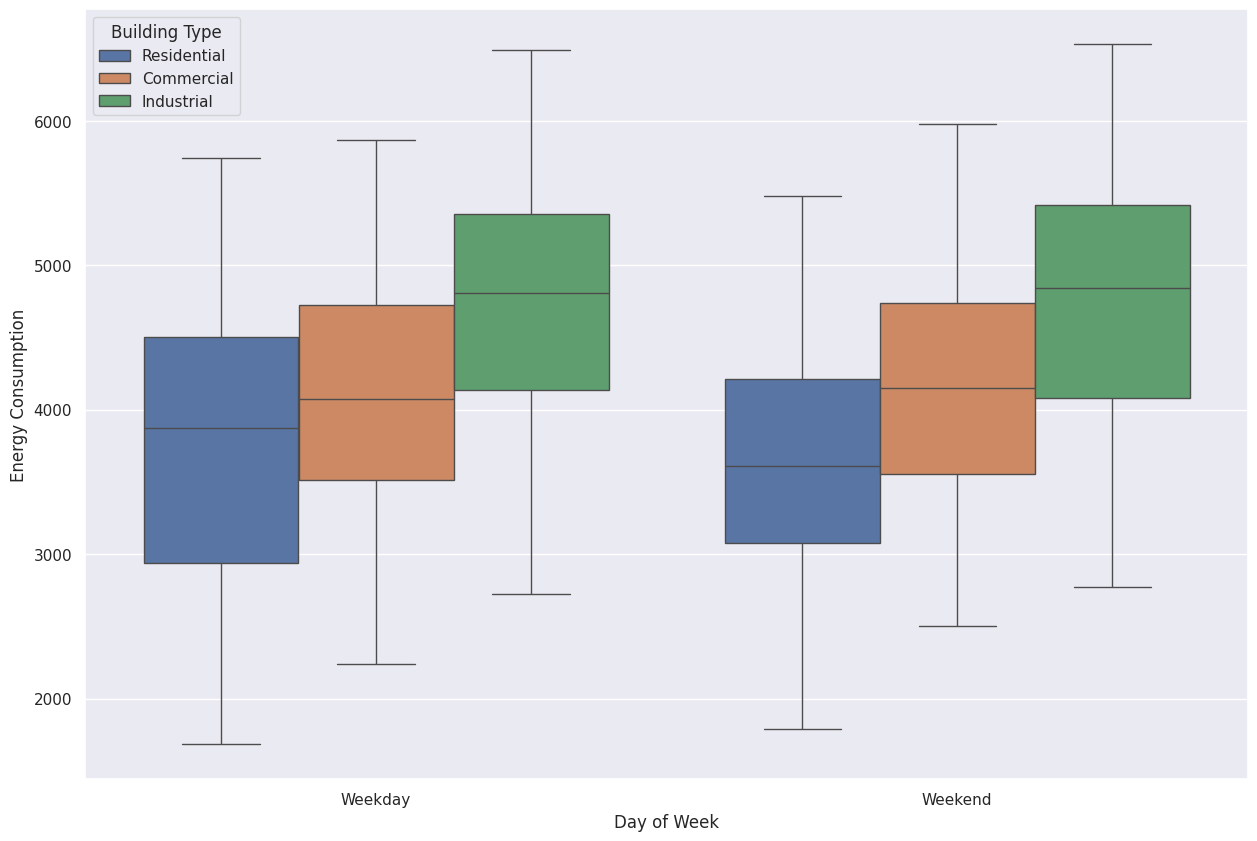

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=energy_train, y='Energy Consumption', x='Day of Week', hue='Building Type')
plt.show()

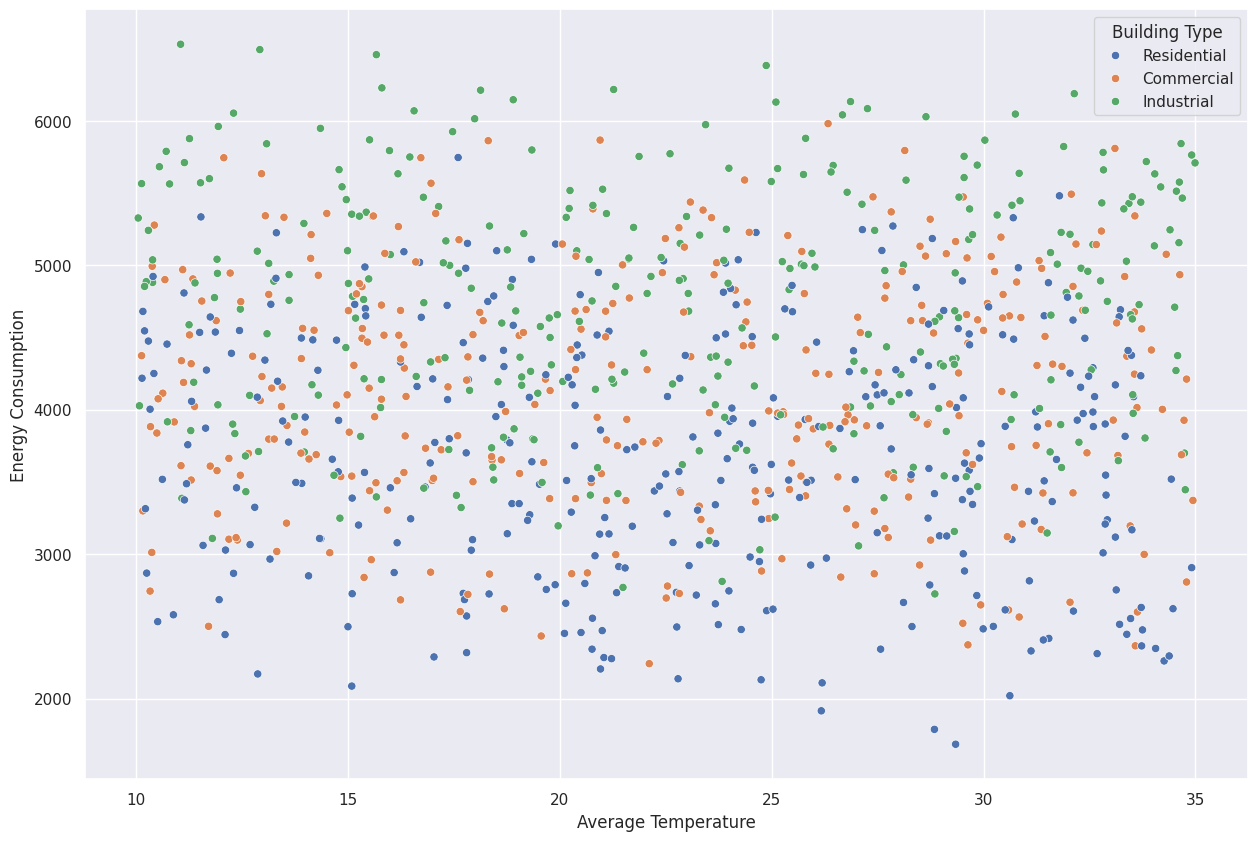

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=energy_train, x='Average Temperature', y='Energy Consumption', hue='Building Type')
plt.show()

In [ ]:
enc = LabelEncoder()

obj = energy_train.select_dtypes(include='object').columns
for i in obj:
  energy_train[i] = enc.fit_transform(energy_train[i])

energy_train.head(2)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99


In [ ]:
corr_train = energy_train.corr()

In [ ]:
print(corr_train['Energy Consumption'].sort_values(ascending=False).round(3)*100)

Energy Consumption     100.0
Square Footage          77.5
Number of Occupants     35.4
Appliances Used         31.3
Day of Week             -0.4
Average Temperature     -3.4
Building Type          -20.2
Name: Energy Consumption, dtype: float64


DATA PREPROCESSING

---

In [ ]:
obj = energy_test.select_dtypes(include='object').columns
for i in obj:
  energy_test[i] = enc.fit_transform(energy_test[i])

energy_test.head(2)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,24563,15,4,28.52,0,2865.57
1,0,27583,56,23,23.07,1,4283.80


MACHINE LEARNING MODEL BUILDING

---

In [ ]:
X_train = energy_train.drop('Energy Consumption', axis=1)
y_train = energy_train['Energy Consumption']

X_test = energy_test.drop('Energy Consumption', axis=1)
y_test = energy_test['Energy Consumption']

rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [ ]:
test_pred = rg.predict(X_test)
acc_score = r2_score(y_test, test_pred)
print(f"accuracy score for test is {acc_score}")

accuracy score for test is 0.9800682349318871


In [ ]:
importance = rg.feature_importances_
columns = X_train.columns
feature_importance = pd.DataFrame({'Feature': columns,
                                   'Importance': importance}).sort_values(by='Importance', ascending=False)
print(feature_importance)

               Feature  Importance
1       Square Footage    0.626262
0        Building Type    0.179665
2  Number of Occupants    0.093967
3      Appliances Used    0.092744
4  Average Temperature    0.006192
5          Day of Week    0.001170
